<a href="https://colab.research.google.com/github/marcocarlos2375/BBC_food/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the needed packages NLTK, matplotlib, wordcloud. Choose the language you want to
#analyze.

In [ ]:
!pip install nltk
!pip install matplotlib
!pip install wordcloud

#Check if NLTK supports German.

In [ ]:
from nltk.tokenize import word_tokenize

sentence = "Ich bin ein Berliner."
tokens = word_tokenize(sentence)
print(tokens)

['Ich', 'bin', 'ein', 'Berliner', '.']


In [ ]:
#Choose a large corpus (at least 1M, better 10 MB, e.g. Wikipedia, Twitter, see slides spr-04-
#corpus-words.pdf) that is available in the chosen language. Load it in NLTK and use it for
#the following exercises.

#Calculate the lexical richness of the selected corpus

In [ ]:
import nltk

# Open and read the corpus
with open('deu_news_1995.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Count the total number of tokens
total_tokens = len(tokens)

# Count the number of unique tokens (types)
total_types = len(set(tokens))

# Calculate the Type-Token Ratio
ttr = total_types / total_tokens

print(f'Lexical richness (TTR) of the corpus: {ttr}')


Lexical richness (TTR) of the corpus: 0.23394678138942002


Plot the character distribution of your selected corpus.

C:\Users\carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


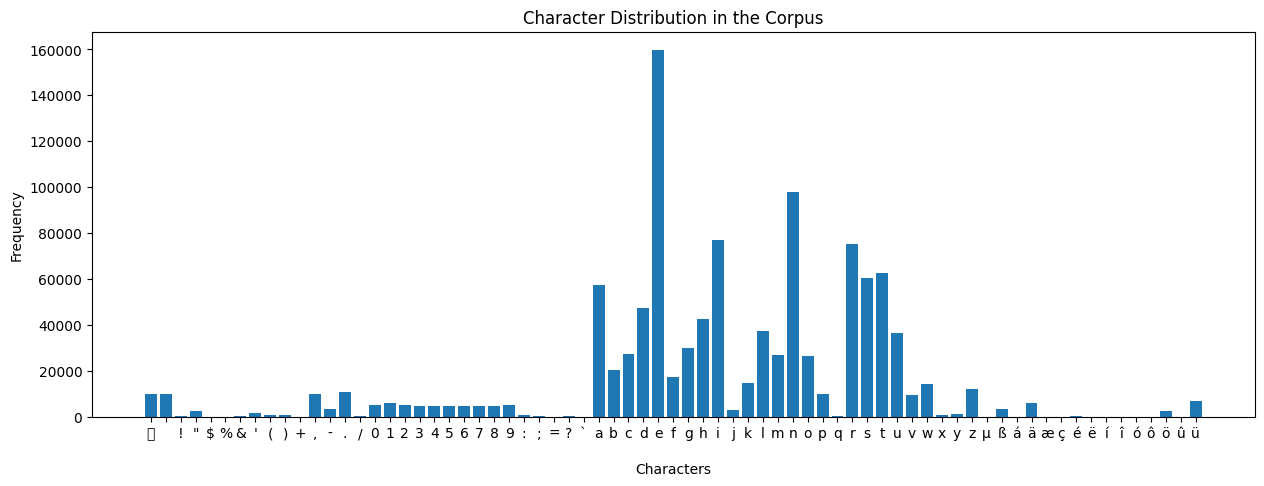

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import operator

# Open and read the corpus
with open('deu_news_1995.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()  # convert to lowercase

# Remove spaces if you want
text = text.replace(" ", "")

# Count the frequency of each character
char_counter = Counter(text)

# Sort the counter by character for a cleaner plot
char_counter = dict(sorted(char_counter.items(), key=operator.itemgetter(0)))

# Create a bar plot
plt.figure(figsize=(15,5))
plt.bar(char_counter.keys(), char_counter.values())
plt.title('Character Distribution in the Corpus')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()


Plot the word distribution of the 20 most often used words of your selected corpus (with
stopwords).

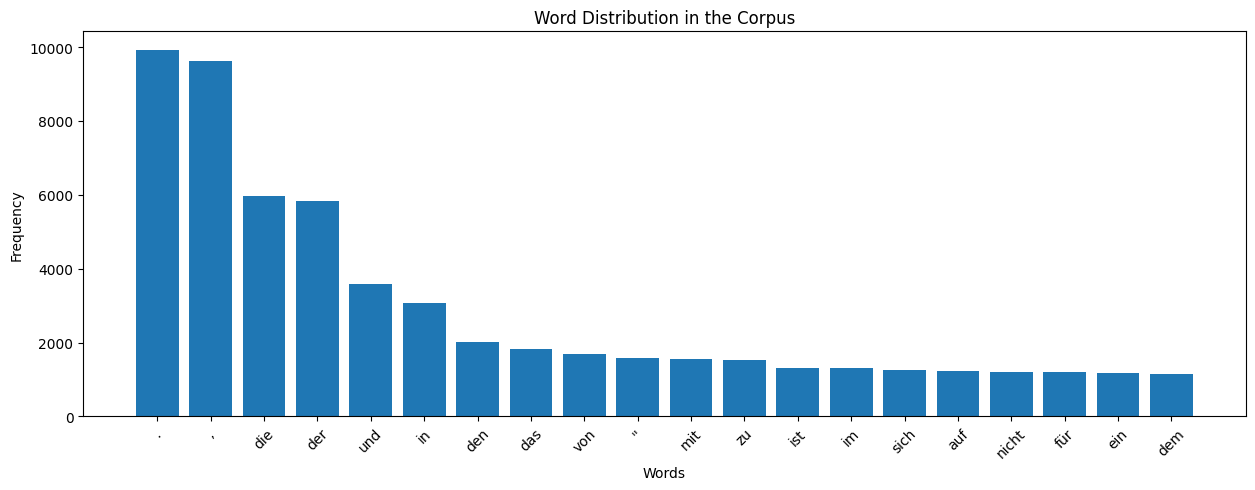

In [ ]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter

# Open and read the corpus
with open('deu_news_1995.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()  # convert to lowercase

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Count the frequency of each word
word_counter = Counter(tokens)

# Get the 20 most common words
most_common_words = word_counter.most_common(20)

# Separate the words and their counts into two lists
words, counts = zip(*most_common_words)

# Create a bar plot
plt.figure(figsize=(15,5))
plt.bar(words, counts)
plt.title('Word Distribution in the Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Plot the dispersion plot of the 5 most often used words

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

<Figure size 1500x500 with 0 Axes>

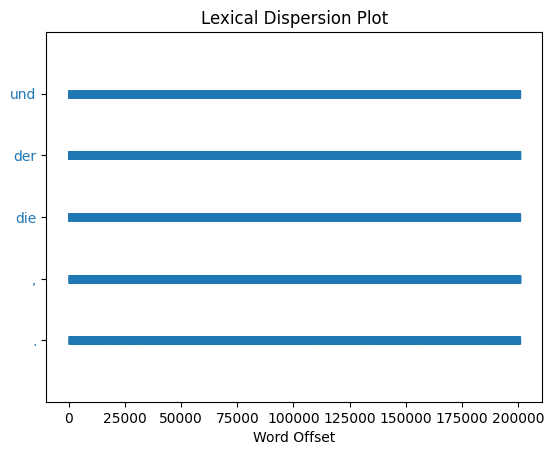

In [ ]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter

# Open and read the corpus
with open('deu_news_1995.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Count the frequency of each word
word_counter = Counter(tokens)

# Get the 5 most common words
most_common_words = word_counter.most_common(5)

# Separate the words from their counts
words = [word for word, count in most_common_words]

# Create a dispersion plot
plt.figure(figsize=(15,5))
nltk.draw.dispersion_plot(tokens, words)


Find the longest word in the text. Select an algorithm for splitting words (also called word
break algorithm) and split the word into subwords

In [ ]:
import nltk

# Open and read the corpus
with open('deu_news_1995.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Find the longest word
longest_word = max(tokens, key=len)

print(f'The longest word in the text is: {longest_word}')


The longest word in the text is: 'esistschwierigeinentextohneabständezwischendenwortenzulese


#Find a short sentence with 5 words (plus/minus 1). Create a context-free grammar for the
sentence.

In [ ]:
import nltk

# Open and read the corpus
with open('deu_news_1995.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text)

# Find a sentence with 5 words (plus/minus 1)
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    if 4 <= len(words) <= 6:
        selected_sentence = sentence
        break

print(f'The selected sentence is: {selected_sentence}')


The selected sentence is: 54, 10117 Berlin).


In [ ]:
grammar = nltk.CFG.fromstring("""
    S -> NUM COMMA ZIP CITY RPAREN
    NUM -> '54'
    COMMA -> ','
    ZIP -> '10117'
    CITY -> 'Berlin'
    RPAREN -> ')'
""")


#Select a suitable stemmer and stem every word in the sentence found with part 8.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Create a stemmer for German
stemmer = SnowballStemmer("german")

# The longest word found in the text
longest_word = "esistschwierigeinentextohneabständezwischendenwortenzulese"

# Stem the word
stemmed_word = stemmer.stem(longest_word)

print(f'The stemmed word is: {stemmed_word}')


# Assuming 'subwords' is a list of subwords from the longest word
subwords = ['es', 'ist', 'schwierig', 'einen', 'text', 'ohne', 'abstände', 'zwischen', 'den', 'worten', 'zu', 'lesen']

# Stem each subword
stemmed_subwords = [stemmer.stem(word) for word in subwords]

print(f'The stemmed subwords are: {stemmed_subwords}')



The stemmed word is: esistschwierigeinentextohneabstandezwischendenwortenzules
The stemmed subwords are: ['es', 'ist', 'schwierig', 'ein', 'text', 'ohn', 'abstand', 'zwisch', 'den', 'wort', 'zu', 'les']


#Find a lemmatizer for the language and lemmatize every word in the sentence.

In [ ]:
!pip install spacy
!python -m spacy download de_core_news_sm



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\carlos\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     --------------------------------------- 12.2/12.2 MB 17.7 MB/s eta 0:00:00
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
     ---------------------------------------- 91.9/91.9 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.4 MB/s eta 0:00:00
  Using cached wasabi-1.1.1-py3-none-any.whl (27 kB)
     -------------------------------------- 478.8/478.8 kB 5.0 MB/s eta 0:00:00
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ---------------------------------------- 2.1/2.1 MB 19.0 MB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached charset_normalizer-3.1.0


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\carlos\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import spacy

# Load the German language model
nlp = spacy.load("de_core_news_sm")

# The longest word found in the text (already split into subwords for illustration)
subwords = ['es', 'ist', 'schwierig', 'einen', 'text', 'ohne', 'abstände', 'zwischen', 'den', 'worten', 'zu', 'lesen']

# Lemmatize each subword
lemmatized_subwords = []
for word in subwords:
    doc = nlp(word)
    lemmatized_subwords.append(doc[0].lemma_)

print(f'The lemmatized subwords are: {lemmatized_subwords}')


The lemmatized subwords are: ['es', 'sein', 'schwierig', 'ein', 'Text', 'ohne', 'abständ', 'zwischen', 'der', 'Wort', 'zu', 'lesen']


Remove stopwords and repeat exercise 6 (word distribution)

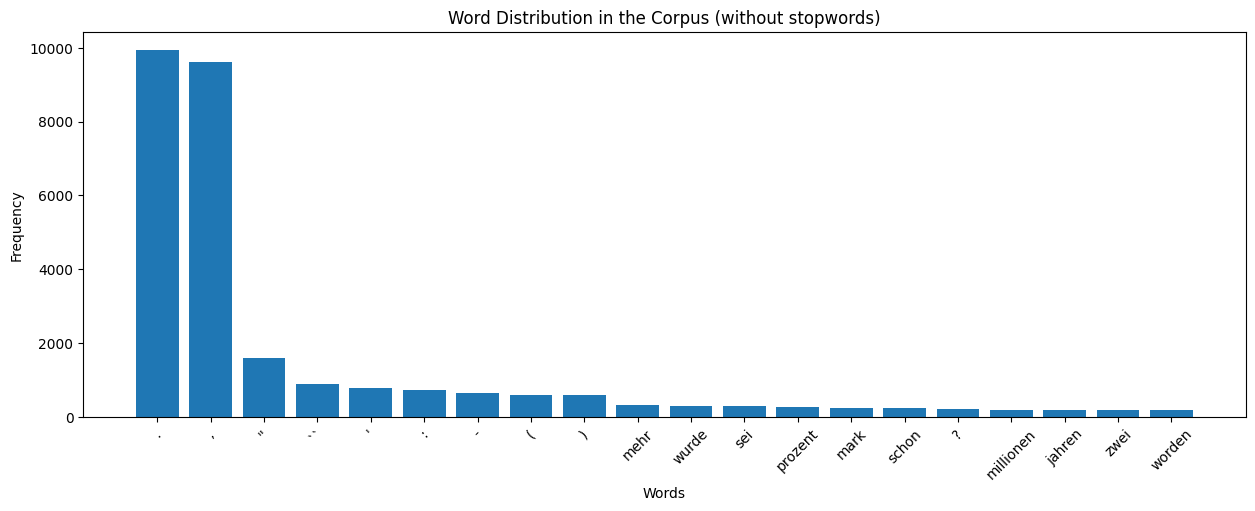

In [ ]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter

# Open and read the corpus
with open('deu_news_1995.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()  # convert to lowercase

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Load German stopwords
stopwords = nltk.corpus.stopwords.words('german')

# Remove stopwords from tokens
tokens = [token for token in tokens if token not in stopwords]

# Count the frequency of each word
word_counter = Counter(tokens)

# Get the 20 most common words
most_common_words = word_counter.most_common(20)

# Separate the words and their counts into two lists
words, counts = zip(*most_common_words)

# Create a bar plot
plt.figure(figsize=(15,5))
plt.bar(words, counts)
plt.title('Word Distribution in the Corpus (without stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Print a wordcloud without your stopwords.

In [ ]:
!pip install wordcloud matplotlib



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\carlos\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


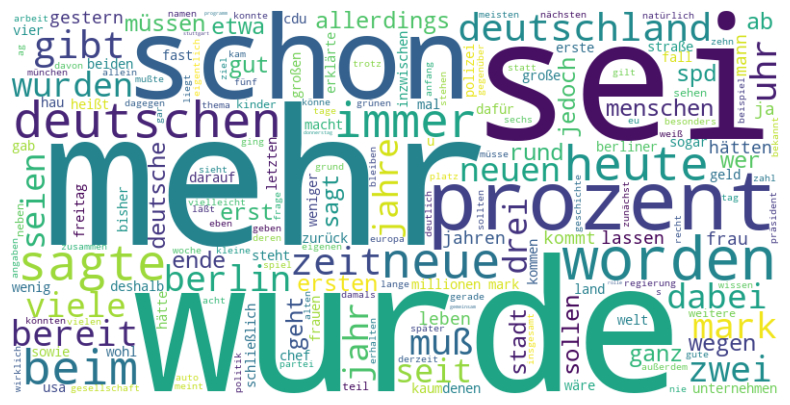

In [ ]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Open and read the corpus
with open('deu_news_1995.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Load German stopwords
stopwords = nltk.corpus.stopwords.words('german')

# Remove stopwords from tokens
tokens_without_stopwords = [token for token in tokens if token not in stopwords]

# Join tokens back into a text string
text_without_stopwords = ' '.join(tokens_without_stopwords)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_without_stopwords)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
